In [3]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [4]:
tickers = ['PG', 'MSFT', 'F', 'GE']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t, data_source= 'yahoo', start= '1995-1-1')['Adj Close']

In [5]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6088 entries, 1995-01-03 to 2019-03-08
Data columns (total 4 columns):
PG      6088 non-null float64
MSFT    6088 non-null float64
F       6088 non-null float64
GE      6088 non-null float64
dtypes: float64(4)
memory usage: 237.8 KB


In [4]:
mydata.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,6.528542,2.718300,3.471492,2.742910
1995-01-04,6.476213,2.738060,3.564892,2.742910
1995-01-05,6.384629,2.692897,3.533757,2.749633
1995-01-06,6.397709,2.738060,3.533757,2.736187
1995-01-09,6.371546,2.721123,3.596028,2.709295


In [5]:
mydata.tail()

,PG,MSFT,F,GE
Date,,,,
2019-02-28,98.550003,112.029999,8.77,10.39
2019-03-01,98.440002,112.529999,8.79,10.27
2019-03-04,98.870003,112.260002,8.81,10.38
2019-03-05,99.089996,111.699997,8.77,9.89
2019-03-06,98.930000,111.750000,8.58,9.11


## Normalisation to 100

                                (Pt/P0) * 100

In [7]:
#Extract data from 1st row of data
mydata.iloc[0]

PG      6.528542
MSFT    2.718300
F       3.471492
GE      2.742910
Name: 1995-01-03 00:00:00, dtype: float64

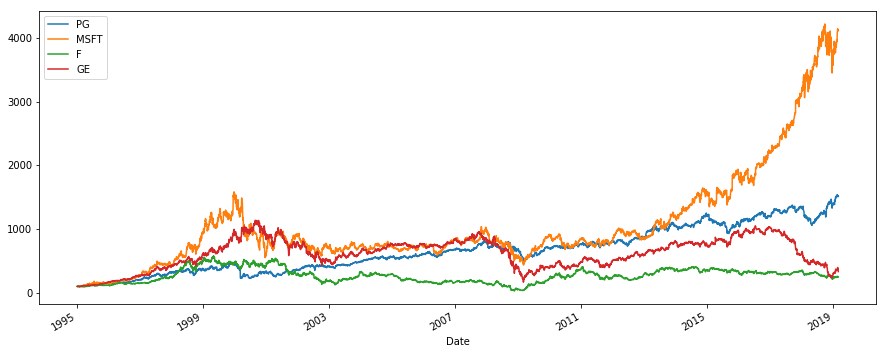

In [8]:
#Comapring behaviour stocks if they had all started from 100 price
(mydata / mydata.iloc[0] * 100).plot(figsize = (15,6));
plt.show()

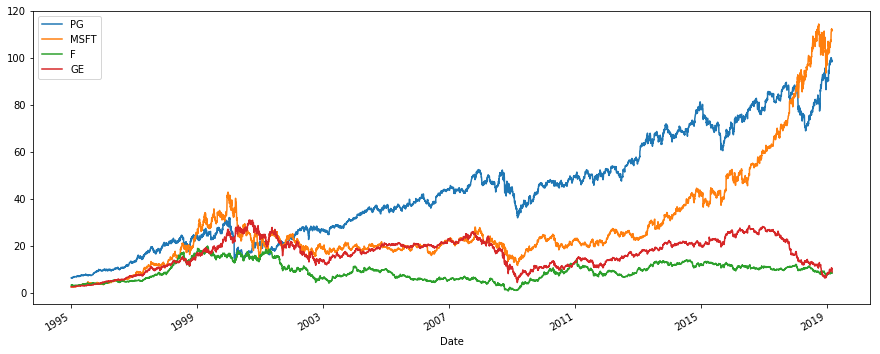

In [15]:
# This is what happens when you do not make the stock start the same price of 100
mydata.plot(figsize=(15,6))
plt.show()

In [10]:
#Use .loc for labels on a table
mydata.loc['1995-1-03']

PG      6.528542
MSFT    2.718300
F       3.471492
GE      2.742910
Name: 1995-01-03 00:00:00, dtype: float64

In [11]:
# Use .iloc for position on a table. [0] means position 1
mydata.iloc[0]

PG      6.528542
MSFT    2.718300
F       3.471492
GE      2.742910
Name: 1995-01-03 00:00:00, dtype: float64

## Calculating the Return of a Portfolio of Securities

In [13]:
#Calculating the returns of a single day: (Pt/Pt-1) - 1
returns = (mydata / mydata.shift(1)) - 1
returns.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008015,0.007269,0.026905,0.000000
1995-01-05,-0.014142,-0.016495,-0.008734,0.002451
1995-01-06,0.002049,0.016771,0.000000,-0.004890
1995-01-09,-0.004090,-0.006186,0.017622,-0.009828


In [14]:
#Distributing the weight of each stock i.e. PG:25% MSFT:25% F:25% GE:25%
weights = np.array([0.25, 0.25, 0.25, 0.25])

In [18]:
#np.dot() calculates vector or matrix products
#The output is the dot product
#This will return an array of values because you need to find the average of the returns
np.dot(returns, weights)

array([        nan,  0.00653969, -0.00922981, ...,  0.00373874,
       -0.01362746, -0.02542486])

In [19]:
#Finding the mean returns for 1 day and multiplying by 250 which is estimated  number of trading days
annual_returns = returns.mean() * 250
annual_returns

PG      0.136677
MSFT    0.202032
F       0.115333
GE      0.094244
dtype: float64

In [20]:
#Multiplying a 1 by 4 matrix(annual_returns) and 4 by 1 matrix(weights) to produce a signle digit.
np.dot(annual_returns, weights)

0.13707159871519692

In [21]:
pfolio_1 = str(round(np.dot(annual_returns, weights), 5) * 100) + ' %'
print pfolio_1

13.707 %


In [23]:
#To find a different weighted portfolio
weights_2 = np.array([0.4, 0.4, 0.15, 0.05])

In [25]:
#Calculating returns of a portfolio and comparing it with another portfolio
pfolio_2 = str(round(np.dot(annual_returns, weights_2), 5) * 100) + ' %'
print pfolio_1
print pfolio_2

13.707 %
15.75 %
